In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'Default.csv'
).iloc[:,1:].dropna()

In [3]:
# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)
df.head()

,default,student,balance,income
0,-0.185599,-0.645936,-0.218835,0.813187
1,-0.185599,1.548141,-0.037616,-1.605496
2,-0.185599,-0.645936,0.492410,-0.131212
3,-0.185599,-0.645936,-0.632893,0.164031
4,-0.185599,-0.645936,-0.102791,0.370915


In [4]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_train = df.iloc[:trainsize, :].copy()
df_test = df.iloc[trainsize:, :].copy()


Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

In [5]:
# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

In [6]:
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

In [7]:
# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [8]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897085

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [9]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914476


## Regularization parameter: Lasso

The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity.  If $\lambda$ is too large, all parameters will be set to zero.  

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

Submit your work and discuss the results with your mentor.

In [10]:
def lasso(alphas, x, y):
    '''Alphas are list of alphas (lambdas), x is training 
    data and y is training target, returns dataframe with coefficients for new alphas'''    
    
    special_lst = []
    for alpha in alphas:
        lasseau = linear_model.Lasso(alpha=alpha)
        lasseau.fit(x, y)
        special_lst.append(lasseau.coef_)
        
    special_df = pd.DataFrame(special_lst)
    
    special_df.columns = x.columns
    special_df['alpha'] = alphas
    
    return special_df

In [11]:
alphanator = list(map(lambda x: x/100.0, range(1, 50, 1)))

In [12]:
lasso_alpha = lasso(alphanator, X_train2, Y_train)

In [13]:
lasso_alpha.head()

,default,student,balance,balance_student,balance_default,student_default,balance_sqrt,balance2,balance3,alpha
0,0.0,-0.749175,0.0,-0.0,0.004649,-0.0,0.0,-0.000000,-1.452173e-09,0.01
1,0.0,-0.738715,-0.0,-0.0,0.002006,-0.0,-0.0,-0.000002,-1.037485e-08,0.02
2,0.0,-0.728221,-0.0,-0.0,0.000000,-0.0,-0.0,-0.000007,-1.421844e-08,0.03
3,0.0,-0.717632,-0.0,-0.0,0.000000,-0.0,-0.0,-0.000018,-1.931312e-08,0.04
4,0.0,-0.707044,-0.0,-0.0,0.000000,-0.0,-0.0,-0.000029,-2.440781e-08,0.05


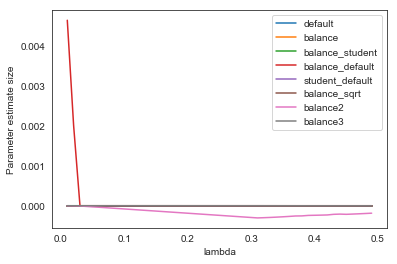

In [14]:
labels = []
for col in lasso_alpha.drop(columns=['alpha', 'student']):
    plt.plot(lasso_alpha['alpha'], lasso_alpha[col])
    labels.append(col)
    
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

In [15]:
def ridge(alphas, x, y):
    '''Alphas are list of alphas, x is training 
    data and y is training target'''
    
    special_lst = []
    for alpha in alphas:
        ridgid = linear_model.Ridge(alpha=alpha, fit_intercept=False)
        ridgid.fit(x, y)
        special_lst.append(pd.DataFrame(ridgid.coef_))
        
    special_df = pd.DataFrame(special_lst)
    
    special_df.columns = x.columns
    special_df['alpha'] = alphas
    
    return special_df

In [16]:
ridge(alphanator, X_train2, Y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.822550e-18
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.646343e-18
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.471431e-18
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-

,default,student,balance,balance_student,balance_default,student_default,balance_sqrt,balance2,balance3,alpha
0,-0.005529,-0.005529,-0.005529,-0.005529,-0.005529,-0.005529,-0.005529,-0.005529,-0.005529,0.01
1,-0.005511,-0.005511,-0.005511,-0.005511,-0.005511,-0.005511,-0.005511,-0.005511,-0.005511,0.02
2,-0.005492,-0.005492,-0.005492,-0.005492,-0.005492,-0.005492,-0.005492,-0.005492,-0.005492,0.03
3,-0.005474,-0.005474,-0.005474,-0.005474,-0.005474,-0.005474,-0.005474,-0.005474,-0.005474,0.04
4,-0.005456,-0.005456,-0.005456,-0.005456,-0.005456,-0.005456,-0.005456,-0.005456,-0.005456,0.05
5,-0.005438,-0.005438,-0.005438,-0.005438,-0.005438,-0.005438,-0.005438,-0.005438,-0.005438,0.06
6,-0.005420,-0.005420,-0.005420,-0.005420,-0.005420,-0.005420,-0.005420,-0.005420,-0.005420,0.07
7,-0.005403,-0.005403,-0.005403,-0.005403,-0.005403,-0.005403,-0.005403,-0.005403,-0.005403,0.08
8,-0.005385,-0.005385,-0.005385,-0.005385,-0.005385,-0.005385,-0.005385,-0.005385,-0.005385,0.09
9,-0.005368,-0.005368,-0.005368,-0.005368,-0.005368,-0.005368,-0.005368,-0.005368,-0.005368,0.10


Ok so I try to do the exact same thing that worked with lasso and it fails with ridge.

I don't know why it's complaining so much. it just did this.

I still need to make it somehow return the dataframe and then I can graph the two dataframes for comparison.